## Implementation

#### Preparing
This is the implementation for the following steps:
1. Input Data
2. Create Diagrams
3. Simplify Digarams (TODO for sentence)
4. Create Circuit


========== Reading File ==========
Sentence: man stand behind the wall 
Image Pos: https://previews.123rf.com/images/ryanking999/ryanking9991702/ryanking999170200409/72735211-apuesto-hombre-de-pie-con-pared-de-ladrillo-asi%C3%A1tico.jpg
Image Neg: https://previews.123rf.com/images/ryanking999/ryanking9991703/ryanking999170300165/72844322-hombre-sentarse-y-sentirse-deprimido-con-pared-de-ladrillo-asi%C3%A1tico.jpg

========== Preprocessing: Sentence ==========

========== Diagram: Sentence ==========
 Original diagram


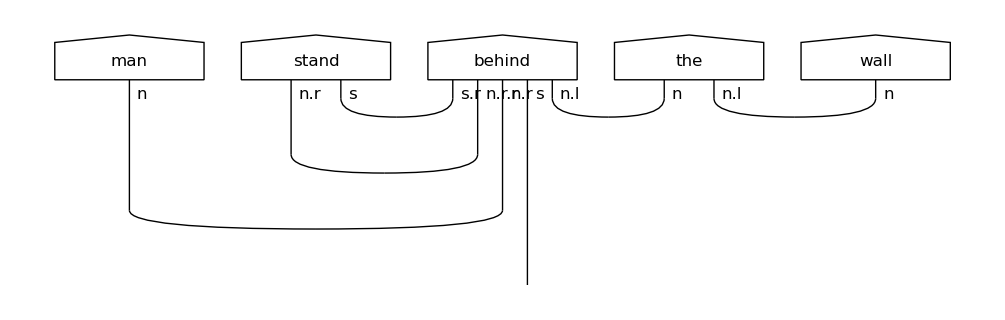

↓ remove cups by bending wires


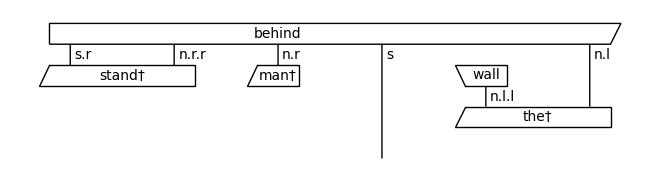


========== Preprocessing: Image ==========
Image URLS: ['https://previews.123rf.com/images/ryanking999/ryanking9991702/ryanking999170200409/72735211-apuesto-hombre-de-pie-con-pared-de-ladrillo-asi%C3%A1tico.jpg', 'https://previews.123rf.com/images/ryanking999/ryanking9991703/ryanking999170300165/72844322-hombre-sentarse-y-sentirse-deprimido-con-pared-de-ladrillo-asi%C3%A1tico.jpg']

*****
 Original image is RGB | new image mode = L

 Before Image size: (866, 1300)
 After Image size: (32, 32)

 Shape after converting to numpy array: (32, 32)
 Shape after adding batch dimension: (1, 32, 32)
 Shape after adding channel dimension: (1, 32, 32, 1)
*****
*****
 Original image is RGB | new image mode = L

 Before Image size: (867, 1300)
 After Image size: (32, 32)

 Shape after converting to numpy array: (32, 32)
 Shape after adding batch dimension: (1, 32, 32)
 Shape after adding channel dimension: (1, 32, 32, 1)
*****

========== Diagram: Image ==========
Diagram 1 : Positive image


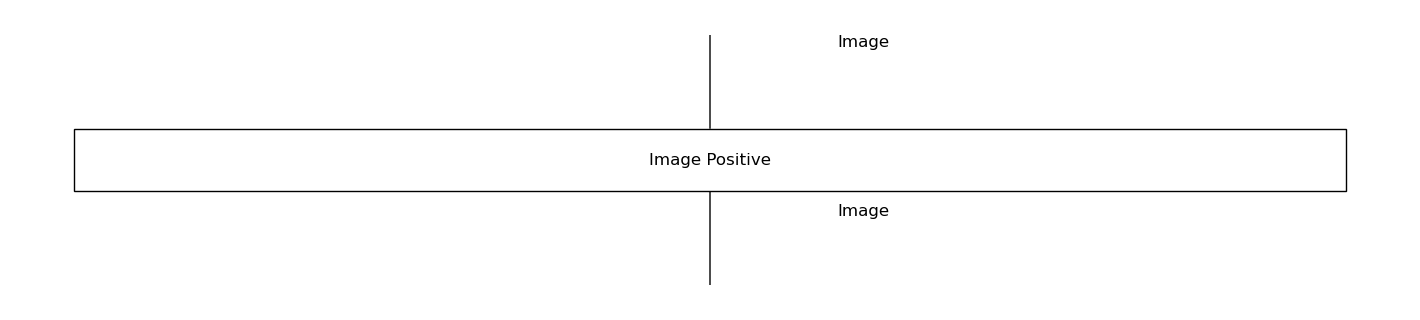

Diagram 2 : Negative image


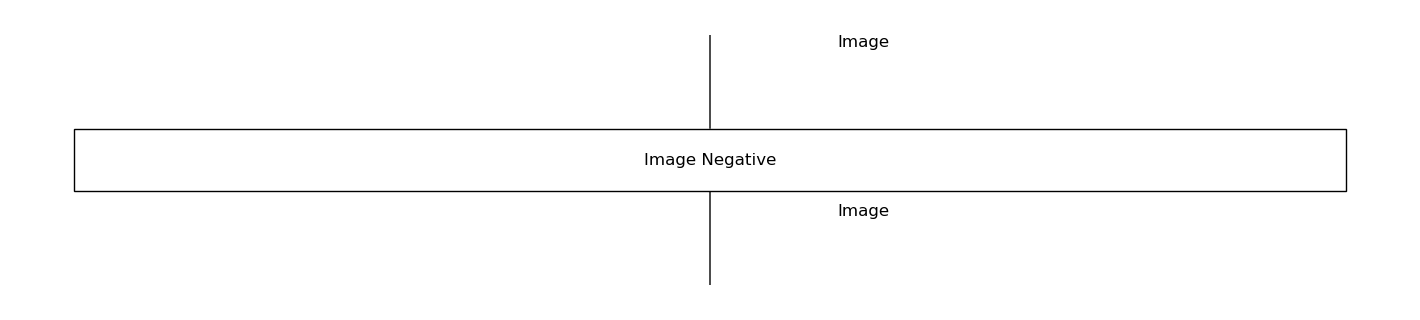


 ========== Circuit: Sentence  ==========


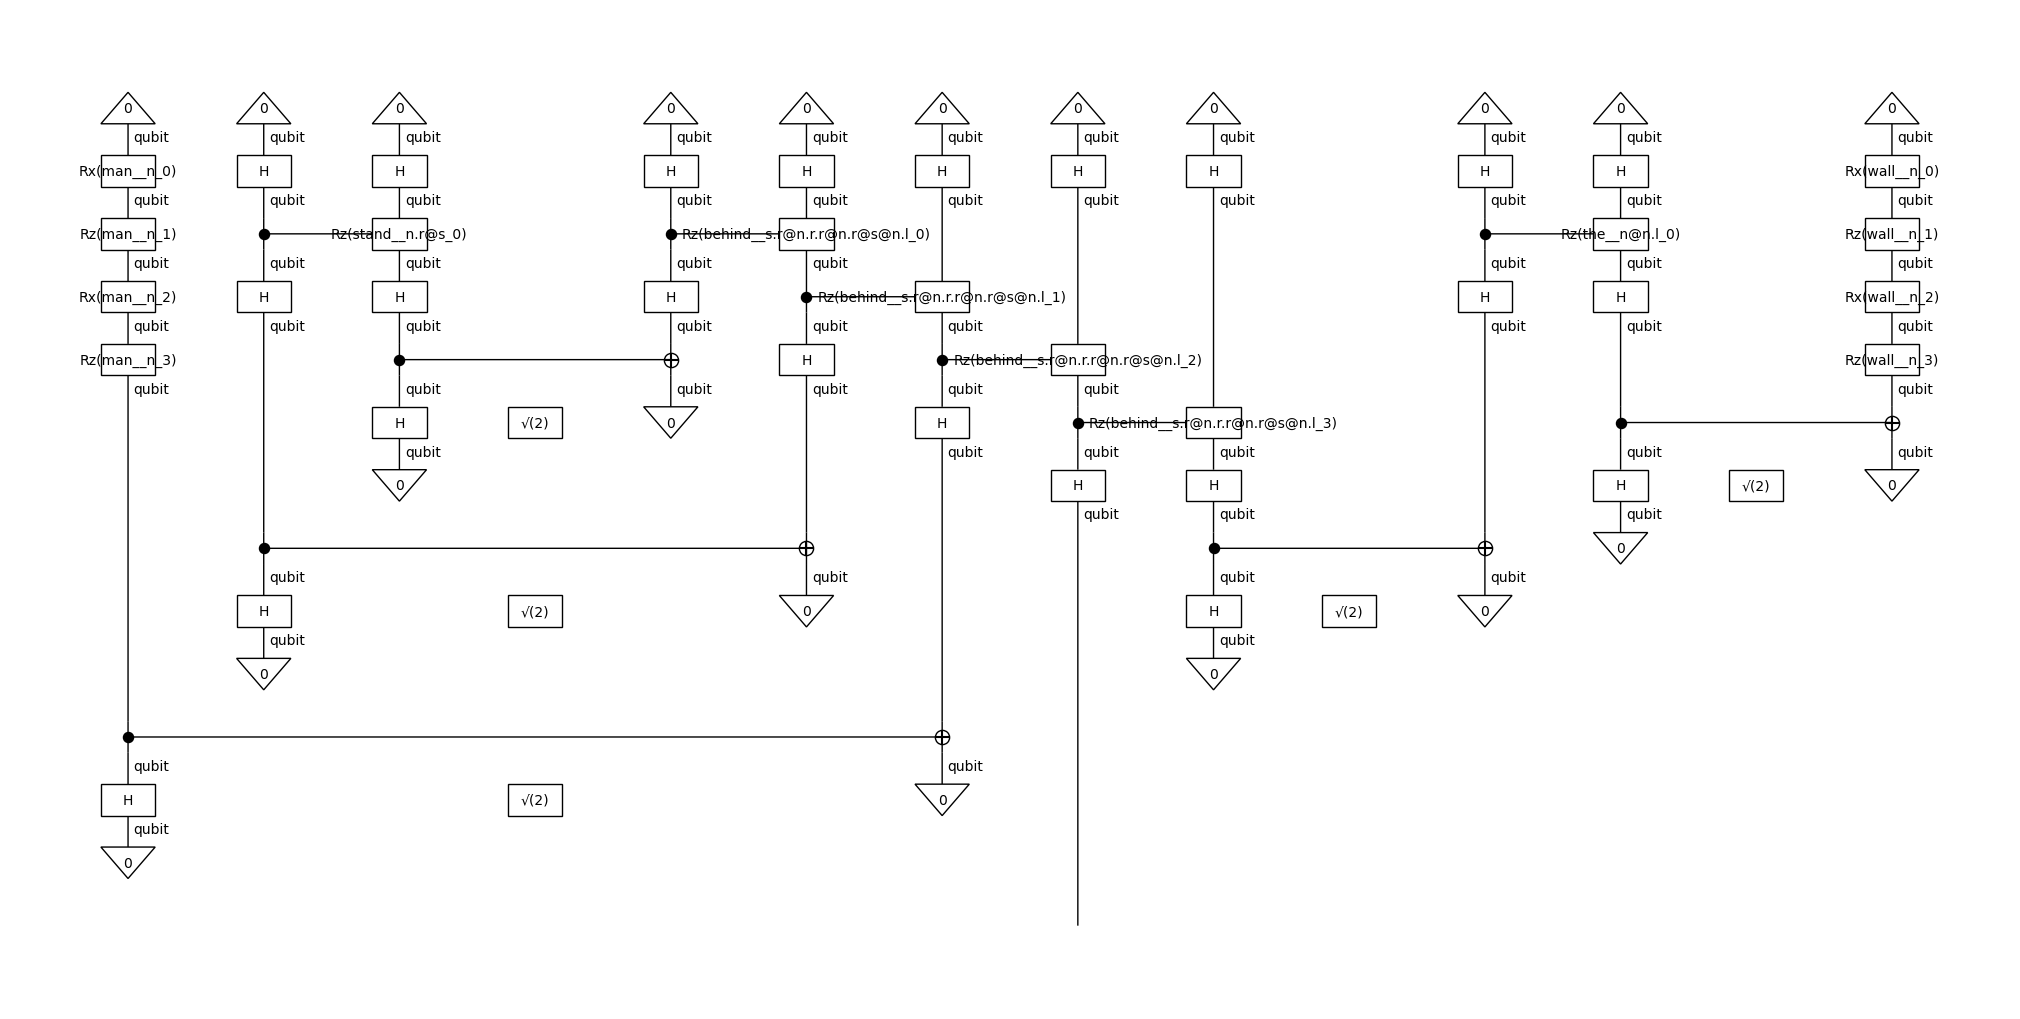


 ========== Circuit: Image  ==========
Circuit 1 : Positive image
 Details:  Diagram(dom=Ty(qubit @ qubit @ qubit @ qubit), cod=Ty(qubit @ qubit @ qubit @ qubit), layers=[Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit @ qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[CRz(Image Positive_Image_Image_0); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[CRz(Image Positive_Image_Image_1); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[CRz(Image Positive_Image_Image_2); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty()), Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit @ qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty

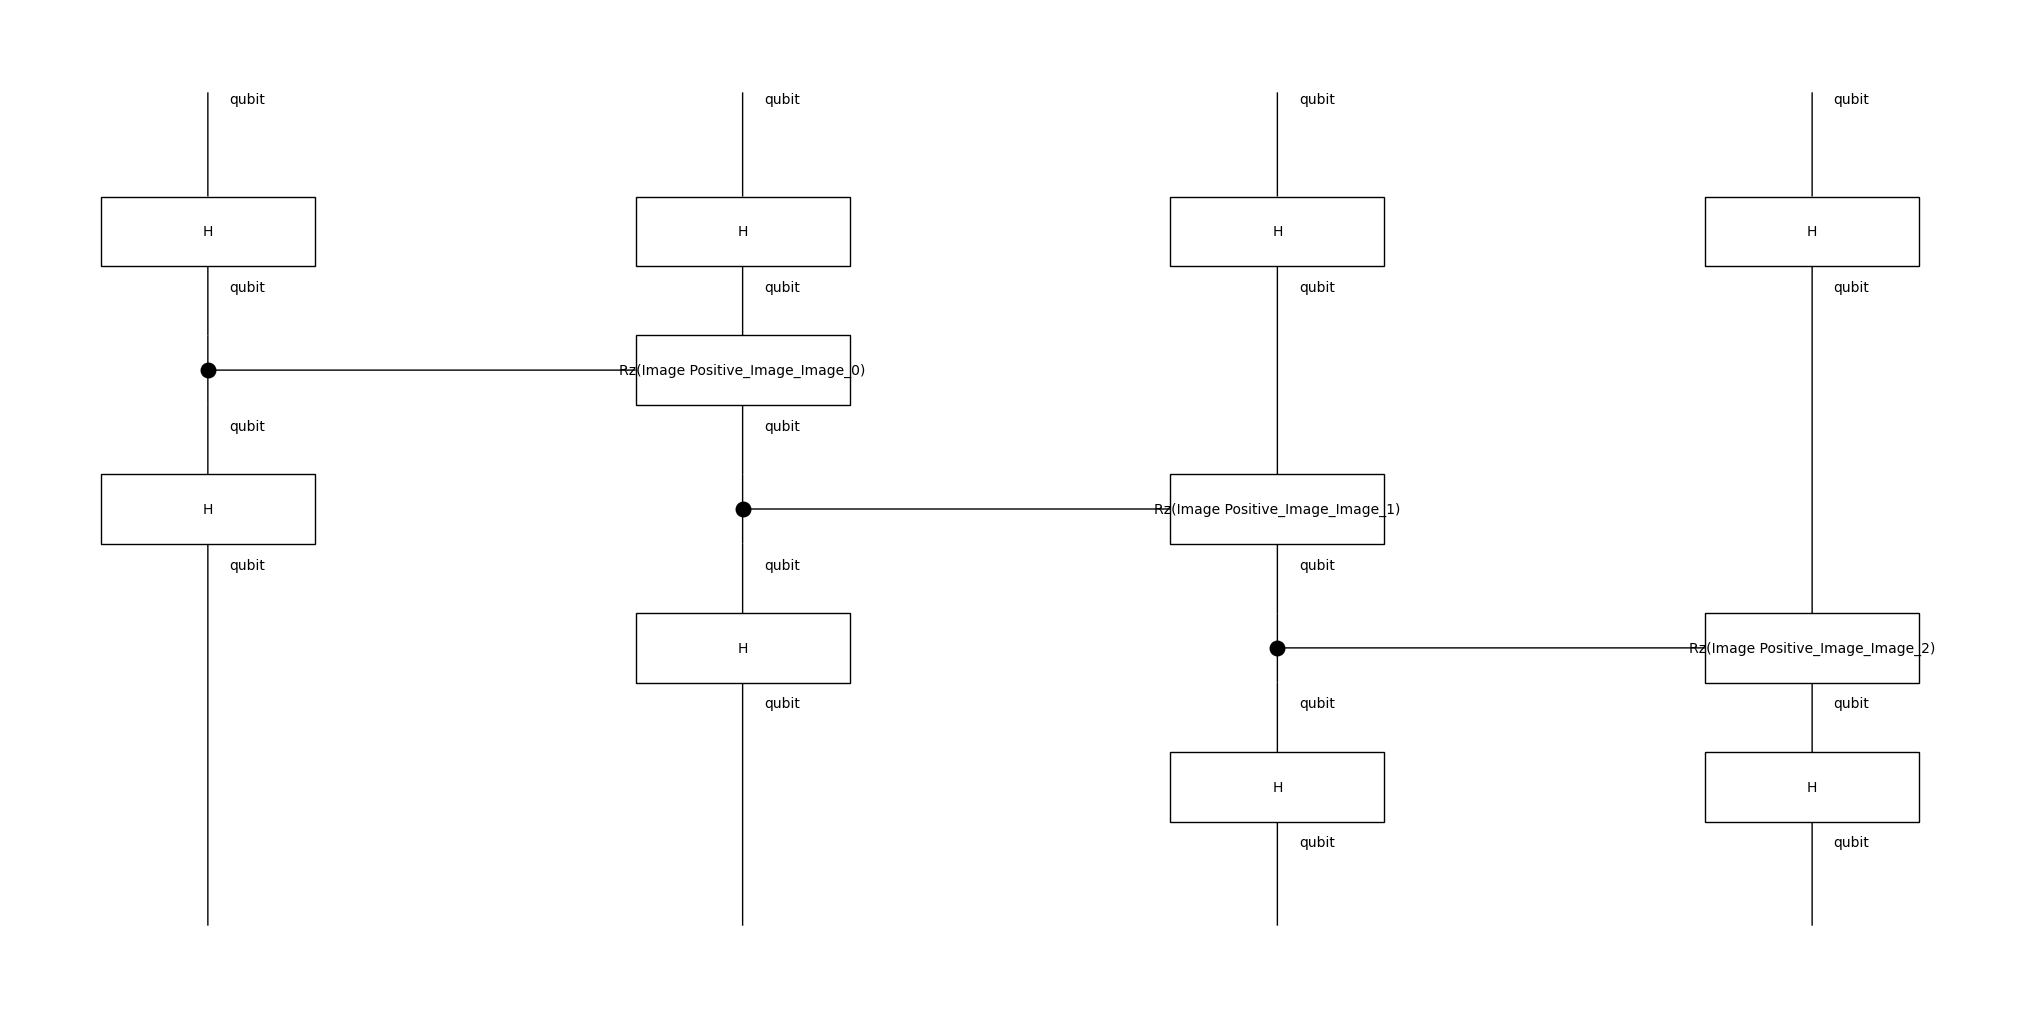

Circuit 2 : Negative image
 Details:  Diagram(dom=Ty(qubit @ qubit @ qubit @ qubit), cod=Ty(qubit @ qubit @ qubit @ qubit), layers=[Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit @ qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[CRz(Image Negative_Image_Image_0); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[CRz(Image Negative_Image_Image_1); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[CRz(Image Negative_Image_Image_2); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty()), Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit @ qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Laye

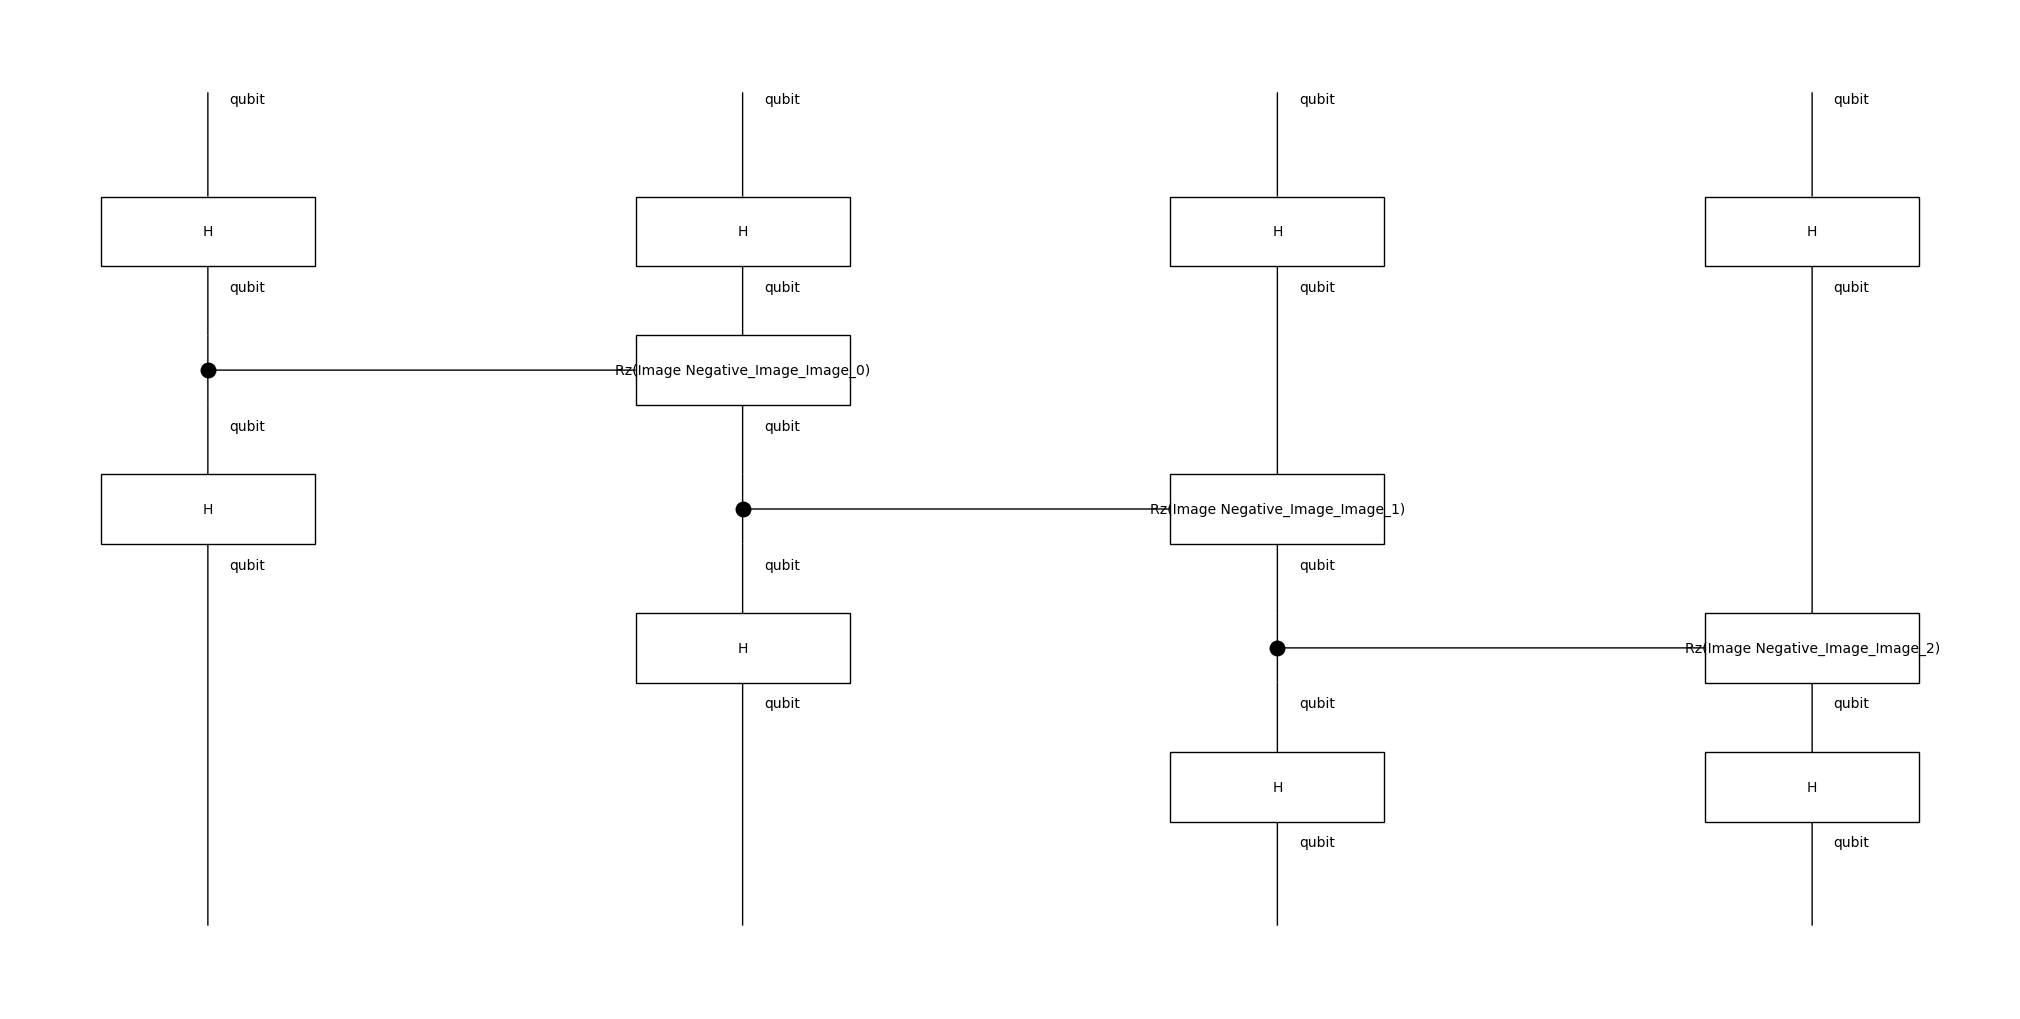

In [7]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from PIL import Image
import requests
import numpy as np
import io
import pandas as pd
import numpy as np

from lambeq import IQPAnsatz
from lambeq import RemoveCupsRewriter
from lambeq import BobcatParser
from lambeq.backend.grammar import Box, Ty
from lambeq import AtomicType, IQPAnsatz

# Create a subclass for the Box class to include additional dataset details
class ImageBox(Box):
    def __init__(self, name, dom, cod, image=None, label=None):
        super().__init__(name, dom, cod)
        self.image = image
        self.label = label

def download_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

def preprocess_image(img, target_size):
    print("*****")
    # Show original image
    # print("Displayed Original Image.")
    # img.show()

    # Convert to grayscale if specified and the image is not already grayscale
    if img.mode != 'L':
        img = img.convert('L')
        print(f" Original image is RGB | new image mode = {img.mode}\n")
    else: 
        print(f" Original image is Greyscale | image mode = {img.mode}\n")
    
    # Resize the image
    print(f" Before Image size: {img.size}")
    img = img.resize(target_size)
    print(f" After Image size: {img.size}\n")
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    print(f" Shape after converting to numpy array: {img_array.shape}")
    
    # Normalize the image
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    print(f" Shape after adding batch dimension: {img_array.shape}")
    img_array = np.expand_dims(img_array, axis=-1)
    print(f" Shape after adding channel dimension: {img_array.shape}")
    print("*****")

    return img_array

def main():
    # ===================================================
    # Read the CSV file
    # ===================================================
    print("\n========== Reading File ==========")

    file_path = os.path.join(os.getcwd(), "database.csv")
    df = pd.read_csv(file_path)

    # Extract the sentence
    sentence = df['sentence'].iloc[0]
    image_pos = df['pos_url'].iloc[0]
    image_neg = df['neg_url'].iloc[0]

    # Print the first row
    print(f"Sentence: {sentence} ")
    print(f"Image Pos: {image_pos}")
    print(f"Image Neg: {image_neg}")

    # ===================================================
    #  Pre-process Sentence
    # ===================================================

    print("\n========== Preprocessing: Sentence ==========")

    # Use BobbcatParser
    parser = BobcatParser(verbose='suppress')
    sentence_diagram = parser.sentence2diagram(sentence)

    print("\n========== Diagram: Sentence ==========")

    print(' Original diagram')
    sentence_diagram.draw(figsize=(14, 3), fontsize=12)

    # ----------------------------------
    # TODO: IS THIS NECESAAARY IS CUPS THE BEST OPTIONS

    remove_cups = RemoveCupsRewriter()  
    print('↓ remove cups by bending wires')
    remove_cups(sentence_diagram).draw()

    # ===================================================
    #  Pre-process Image
    # ===================================================

    print("\n========== Preprocessing: Image ==========")

    # Dynamic Variables
    dimensions = 32

    image_urls = [image_pos, image_neg]
    print(f"Image URLS: {image_urls}\n")

    # ----------------------------------
    # TODO: IS THE PREPROCESSING ENOUGH SHOUDL I DO FEATURE EXTRACTION DIMESNIOSN  BY PIXEL IS TOO SMALL TO UNDERSTAND ANYTHING

    # Download and preprocess images
    images = []
    for image_url in image_urls:
        img = download_image(image_url)
        # print(f"Image details: {img}")
        img_array = preprocess_image(img, target_size=(dimensions, dimensions))
        images.append(img_array)

    # Stack images into a single array for model input
    images_array = np.vstack(images)

    # ===================================================
    # Draw Diagram 
    # ===================================================
    print("\n========== Diagram: Image ==========")

    # Dynamic Variables
    temp_image_pos = images_array[0]
    temp_image_neg = images_array[1]

    # Define a custom type for images
    image_type = Ty('Image')

    # Define morphisms

    # ----------------------------------
    # TODO: IS IT OKAY TO EXTEND THE BOXX CLASS AND ADD THESE DETAILS

    image_diagram_pos = ImageBox('Image Positive', image_type, image_type, image=temp_image_pos, label = 0)
    image_diagram_neg = ImageBox('Image Negative', image_type, image_type, image=temp_image_neg, label = 1)

    print("Diagram 1 : Positive image")
    image_diagram_pos.draw(figsize=(14, 3), fontsize=12)

    print("Diagram 2 : Negative image")
    image_diagram_neg.draw(figsize=(14, 3), fontsize=12)

    # print("Diagram details :")
    # print(f" label = {image_diagram.label}")
    # print(f" image = {image_diagram.image}")

    # ===================================================
    # Prepare ansatz and circuit
    # ===================================================

    print("\n ========== Circuit: Sentence  ==========")

    # ----------------------------------
    # TODO: WHAT IS A N_SINGLE QUBIITS PARAN AND ONLY ONE QUBIT IS ASSIGNED TO SENETNEC AND 1 TO NOUN
    # ----------------------------------        
    ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=4)

    circuit = ansatz(sentence_diagram)
    circuit.draw(figsize=(20,10))

    print("\n ========== Circuit: Image  ==========")

    # Dynamic Variables 3,3
    ob_map = {image_type: 4} # 4 Qubits assigned to image
    n_layers = 1 # One layer 

    # ----------------------------------
    # TODO: where is the atomic type and what is a functor supposed to do

    ansatz = IQPAnsatz(ob_map=ob_map, n_layers=n_layers)
    quantum_circuit_1 = ansatz(image_diagram_pos)
    quantum_circuit_2 = ansatz(image_diagram_neg)

    # Print or visualize the quantum circuit
    print("Circuit 1 : Positive image")
    print(" Details: ", quantum_circuit_1)
    quantum_circuit_1.draw(output='mpl', figsize=(20, 10))

    print("Circuit 2 : Negative image")
    print(" Details: ",quantum_circuit_2)
    quantum_circuit_2.draw(output='mpl', figsize=(20, 10))

    return


main()
